In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

In [2]:
df = pd.read_csv('Data/products_4.csv')
df.head()

,Prod_Desc,Sub_Name,Cat_Name,ID_Proj,Proj_Name,BOM_Quant,Proj_City,Proj_State,Proj_Date
0,"Gabião tipo caixa, malha hexagonal",Aços para Construção,Construção Civil,10414,Gabião - HEMOBRAS Engeko,34.0,Goiana,PE,2023-09-05
1,"Gabião manta (colchão), malha hexagonal",Aços para Construção,Construção Civil,10414,Gabião - HEMOBRAS Engeko,355.0,Goiana,PE,2023-09-05
2,Vergalhão de aço nervurado,Aços para Construção,Construção Civil,10415,Vergalhão - Prefeitura Municipal de Dois Córregos,136.0,Dois Córregos,SP,2023-09-05
3,CONCRETO USINADO CONVENCIONAL,Concreto,Infraestrutura,10416,CONCRETO USINADO - tejofran,104.0,São Paulo,SP,2023-09-05
4,CAIXA DE CONCRETO ARMADO,Artefatos de Concreto,Infraestrutura,10417,CAIXA DE CONCRETO - JAV,14.0,Lauro de Freitas,BA,2023-09-05


In [7]:
### Dados Faltantes em Localização:
### As colunas "Proj_City" e "Proj_State" têm alguns valores ausentes. Precisamos preencher ou lidar com esses dados faltantes.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8808 entries, 0 to 8807
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Prod_Desc   8808 non-null   object 
 1   Sub_Name    8808 non-null   object 
 2   Cat_Name    8808 non-null   object 
 3   ID_Proj     8808 non-null   int64  
 4   Proj_Name   8808 non-null   object 
 5   BOM_Quant   8808 non-null   float64
 6   Proj_City   8499 non-null   object 
 7   Proj_State  8523 non-null   object 
 8   Proj_Date   8808 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 619.4+ KB


In [6]:
df.isnull().sum()

Prod_Desc       0
Sub_Name        0
Cat_Name        0
ID_Proj         0
Proj_Name       0
BOM_Quant       0
Proj_City     309
Proj_State    285
Proj_Date       0
dtype: int64

In [8]:
df.describe()

,ID_Proj,BOM_Quant
count,8808.000000,8808.000000
mean,12074.637489,697.602735
std,854.136336,7763.369772
min,10414.000000,-750.000000
25%,11291.000000,2.000000
50%,12254.500000,12.370000
75%,12797.000000,100.000000
max,13375.000000,299761.000000


In [ ]:
### Remover dados duplicados no ETL

n_duplicates = df.duplicated().sum()
print(f'Número de duplicados: {n_duplicates}')

Número de duplicatas: 247


In [ ]:
### Remover ou aplicar o valor absoluto para o dado negativo abaixo

valores_invalidos = df[(df['BOM_Quant'] < 0) | (df['BOM_Quant'].isnull())]
print(f'Valores inválidos: {(valores_invalidos)}')

Valores inválidos:                                               Prod_Desc       Sub_Name  \
6062  (AMPLA CONCORRÊNCIA) Bloco de\nconcreto, medin...  Sem Categoria   

     Cat_Name  ID_Proj                      Proj_Name  BOM_Quant  \
6062   Outros    12770  UNIVERSIDADE FEDERAL - MG 002     -750.0   

          Proj_City Proj_State  Proj_Date  
6062  Montes Claros         MG 2025-01-13  


<Figure size 1200x800 with 0 Axes>

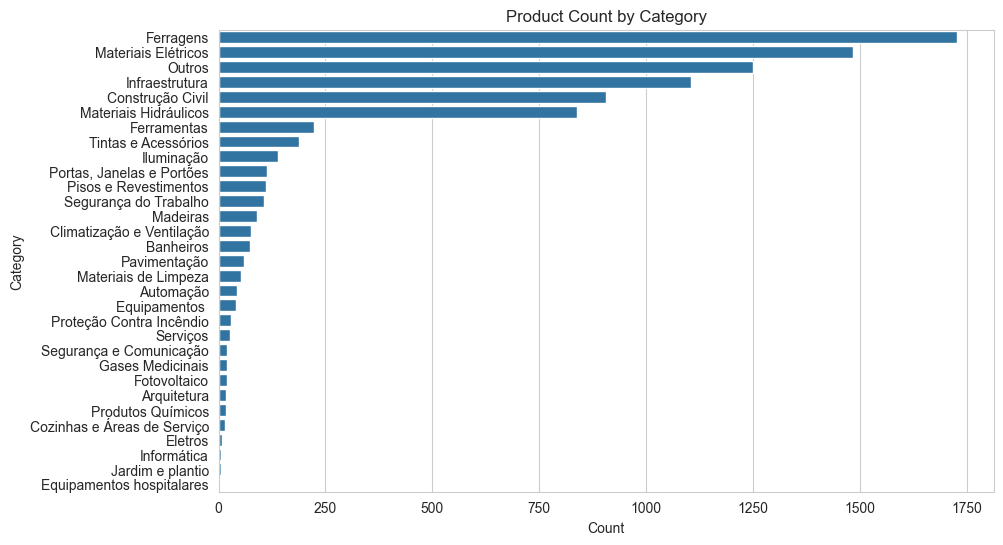

In [13]:
sns.set_style("whitegrid")
plt.figure(figsize=(12, 8))

category_counts = df['Cat_Name'].value_counts()
plt.figure(figsize=(10, 6))
sns.countplot(y='Cat_Name', data=df, order=category_counts.index)
plt.title('Product Count by Category')
plt.xlabel('Count')
plt.ylabel('Category')
plt.show()

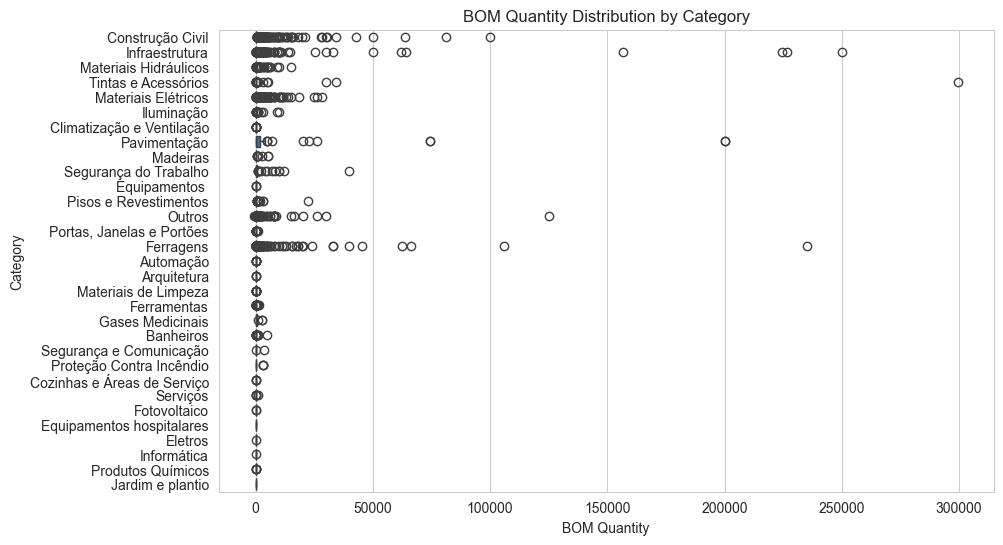

In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='BOM_Quant', y='Cat_Name', data=df)
plt.title('BOM Quantity Distribution by Category')
plt.xlabel('BOM Quantity')
plt.ylabel('Category')
plt.show()

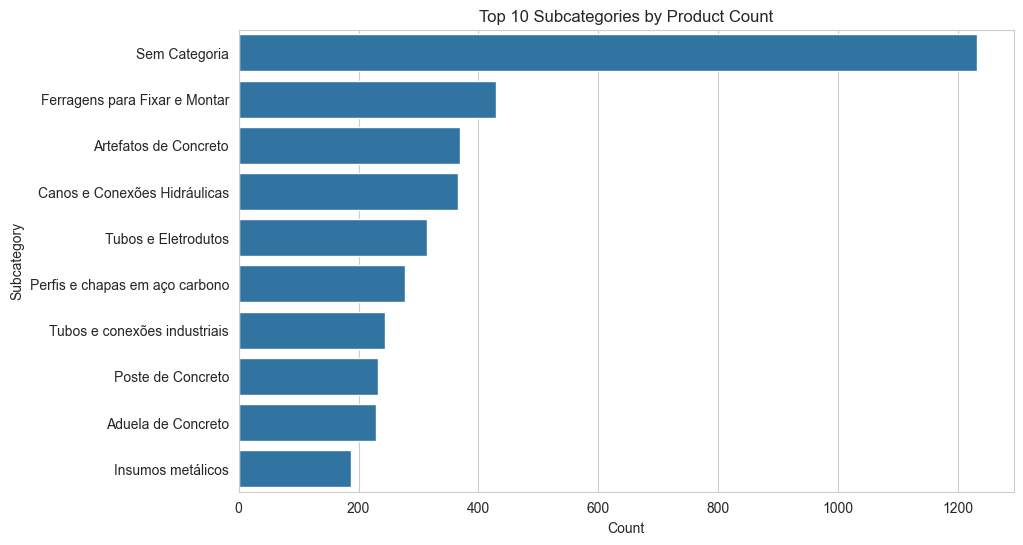

In [15]:
subcategory_counts = df['Sub_Name'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.countplot(y='Sub_Name', data=df, order=df['Sub_Name'].value_counts().index[:10])
plt.title('Top 10 Subcategories by Product Count')
plt.xlabel('Count')
plt.ylabel('Subcategory')
plt.show()

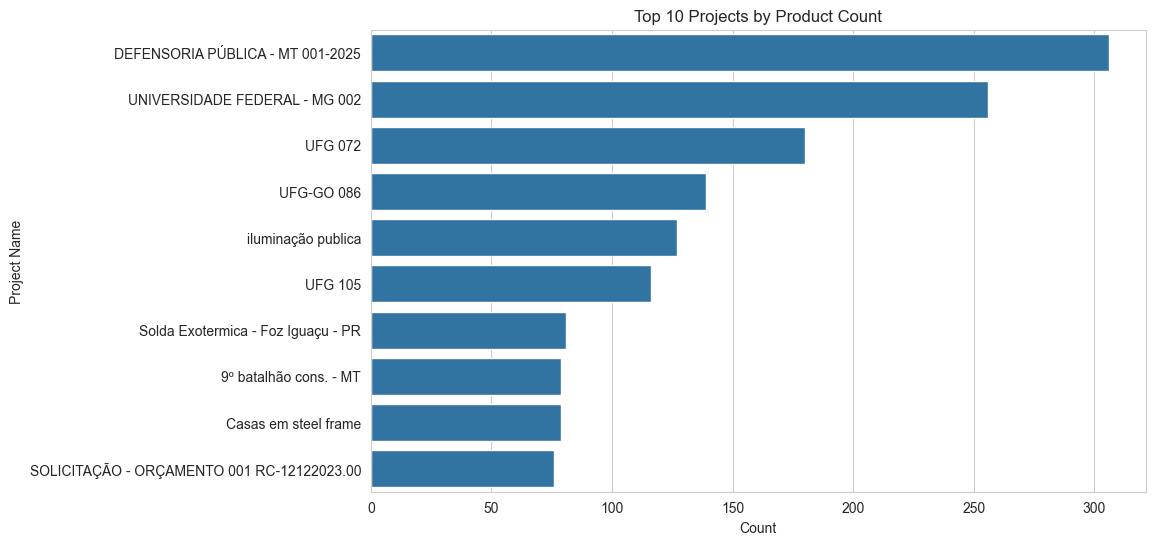

In [16]:
project_counts = df['Proj_Name'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.countplot(y='Proj_Name', data=df, order=df['Proj_Name'].value_counts().index[:10])
plt.title('Top 10 Projects by Product Count')
plt.xlabel('Count')
plt.ylabel('Project Name')
plt.show()

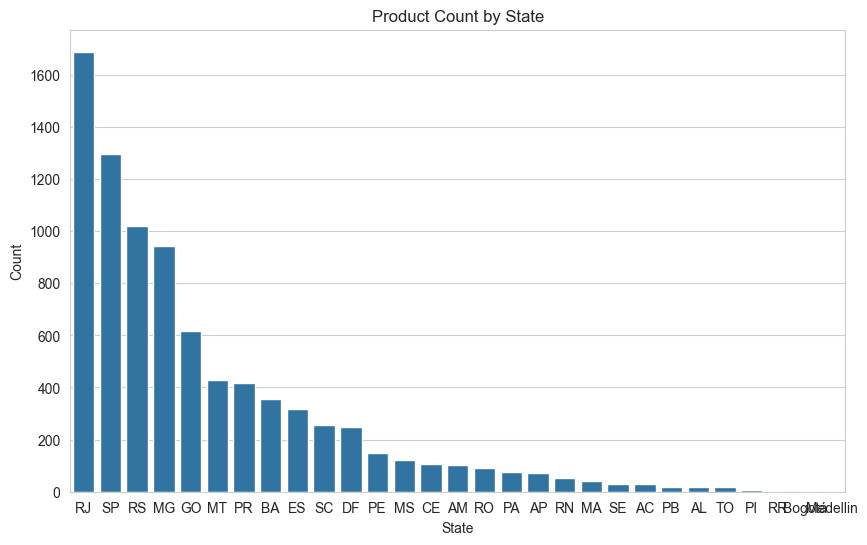

In [17]:
state_counts = df['Proj_State'].value_counts()

plt.figure(figsize=(10, 6))
sns.countplot(x='Proj_State', data=df, order=df['Proj_State'].value_counts().index)
plt.title('Product Count by State')
plt.xlabel('State')
plt.ylabel('Count')
plt.show()

In [18]:
df['Proj_Date'] = pd.to_datetime(df['Proj_Date'])
print(f"Date range: {df['Proj_Date'].min()} to {df['Proj_Date'].max()}")

Date range: 2023-09-05 00:00:00 to 2025-05-02 00:00:00


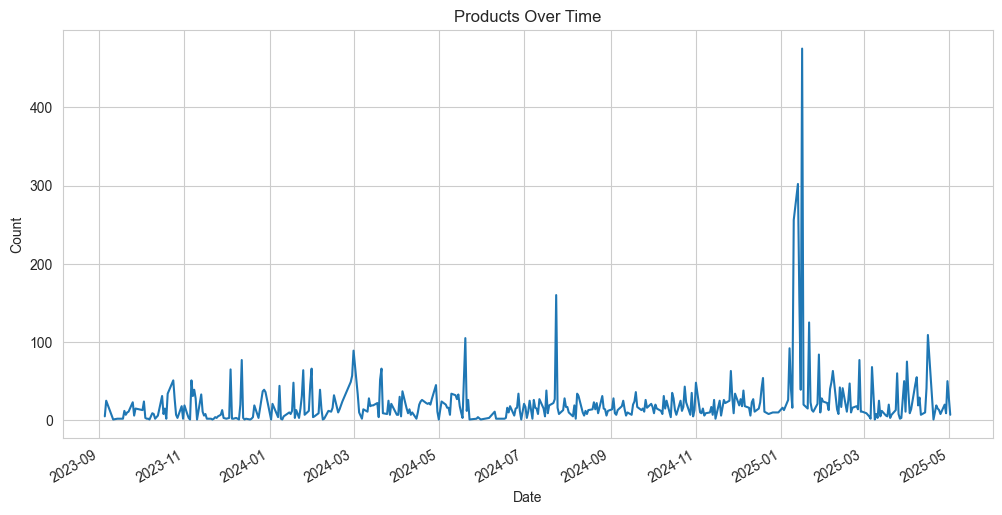

In [19]:
plt.figure(figsize=(12, 6))
df.groupby('Proj_Date').size().plot()
plt.title('Products Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.show()

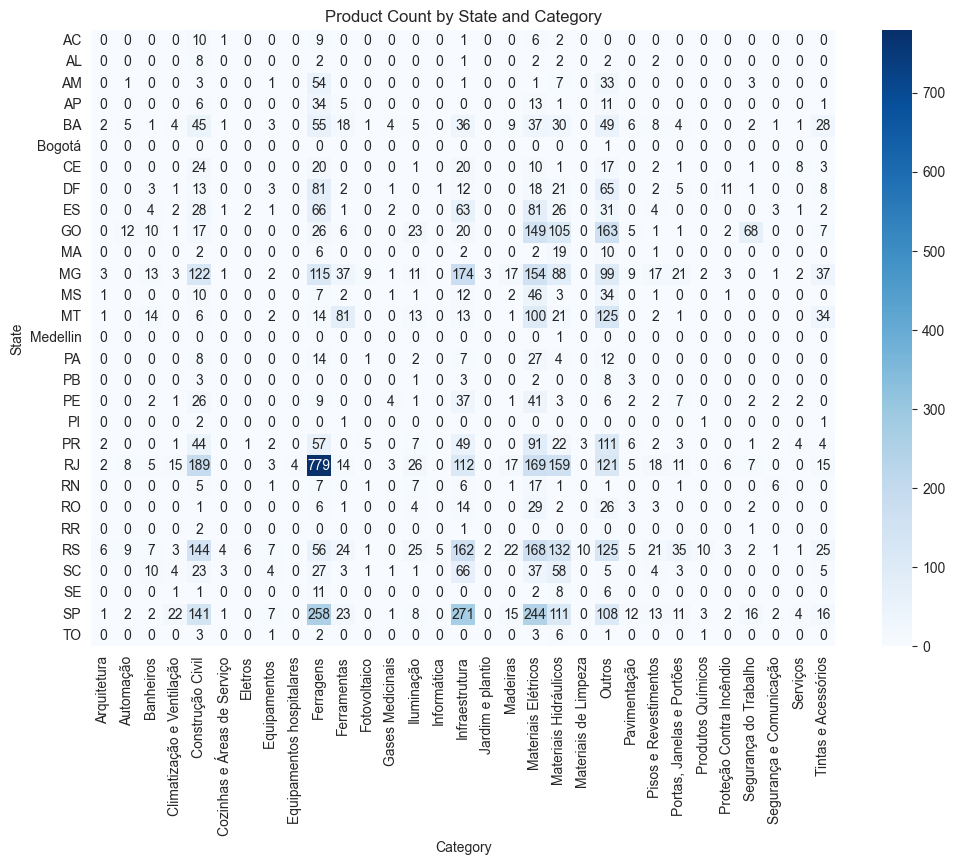

In [22]:
plt.figure(figsize=(12, 8))
sns.heatmap(pd.crosstab(df['Proj_State'], df['Cat_Name']), annot=True, fmt='d', cmap='Blues')
plt.title('Product Count by State and Category')
plt.xlabel('Category')
plt.ylabel('State')
plt.show()

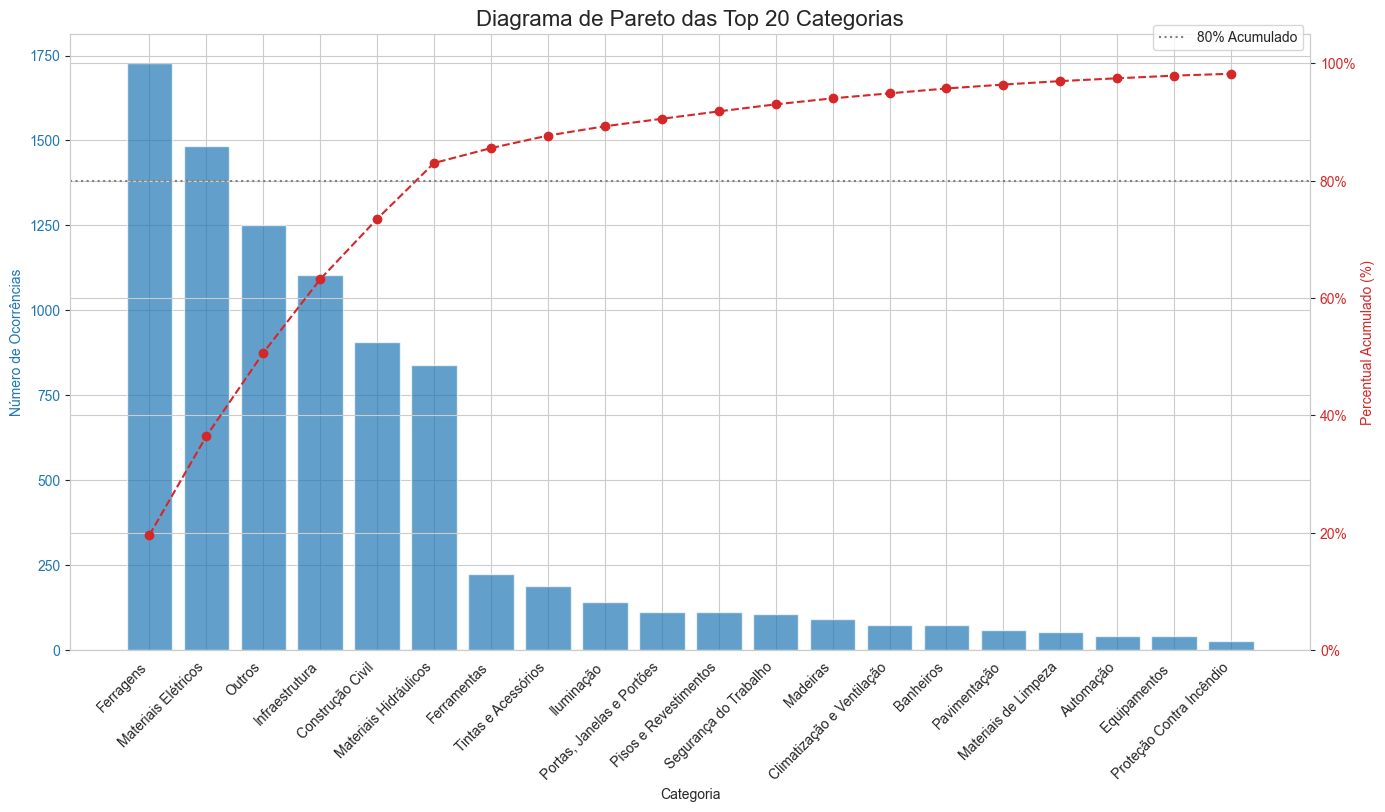

In [29]:
cat_freq_table = pd.DataFrame({
        'Count': category_counts,
        'Percentage': (category_counts / len(df)) * 100,
        'Cumulative Percentage': category_counts.cumsum() / len(df) * 100
})


# Gráfico de Pareto (Barras + Linha Cumulativa)
fig, ax1 = plt.subplots(figsize=(16, 8))
n_pareto = 20 # Número de categorias no gráfico
data_pareto = cat_freq_table.head(n_pareto)

# Barras (Frequência)
color = 'tab:blue'
ax1.set_xlabel('Categoria')
ax1.set_ylabel('Número de Ocorrências', color=color)
bars = ax1.bar(data_pareto.index, data_pareto['Count'], color=color, alpha=0.7)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticks(range(len(data_pareto))) # Garantir ticks para todas as barras
ax1.set_xticklabels(data_pareto.index, rotation=45, ha='right')

# Linha (Percentual Cumulativo)
ax2 = ax1.twinx() # Compartilha o mesmo eixo X
color = 'tab:red'
ax2.set_ylabel('Percentual Acumulado (%)', color=color)
ax2.plot(data_pareto.index, data_pareto['Cumulative Percentage'], color=color, marker='o', linestyle='--')
ax2.tick_params(axis='y', labelcolor=color)
ax2.yaxis.set_major_formatter(mtick.PercentFormatter())
ax2.axhline(80, color='gray', linestyle=':', label='80% Acumulado') # Linha de 80%
ax2.set_ylim(0, 105) # Limite do eixo Y percentual

plt.title(f'Diagrama de Pareto das Top {n_pareto} Categorias', fontsize=16)
fig.legend(loc='upper right', bbox_to_anchor=(0.9, 0.9))

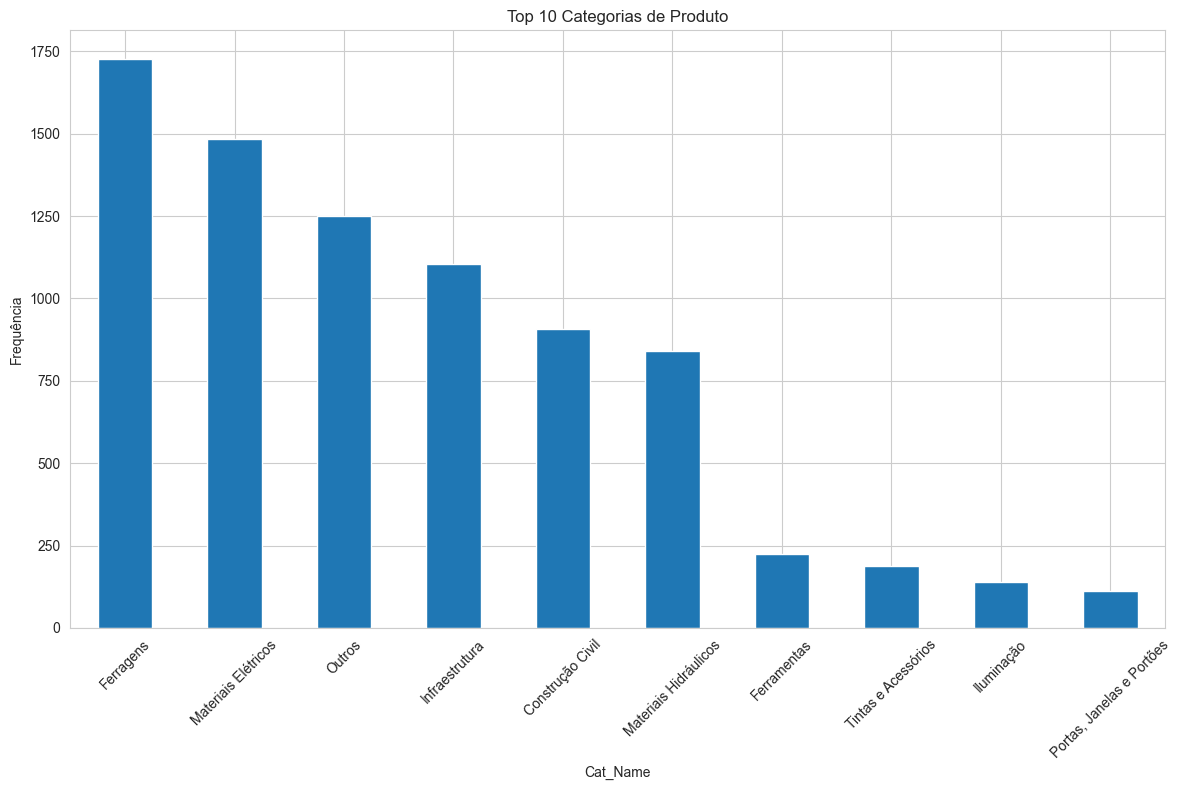

In [ ]:
top_categorias = df['Cat_Name'].value_counts().head(10)


top_categorias.plot(kind='bar')
plt.title("Top 10 Categorias de Produto")
plt.ylabel("Frequência")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_3216\2206909904.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_states['Proj_Month'] = df_top_states['Proj_Date'].dt.to_period('M')


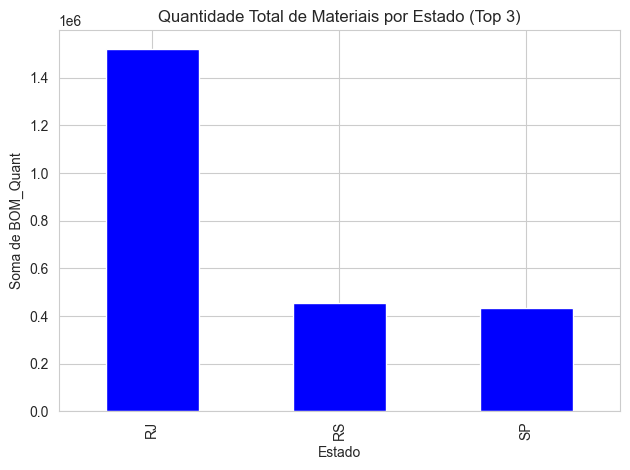

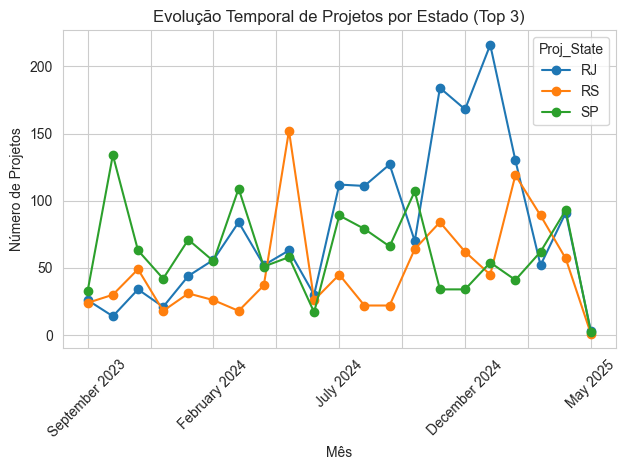

In [35]:
df_top_states = df[df['Proj_State'].isin(['RJ', 'SP', 'RS'])]

cat_by_state = df_top_states.groupby(['Proj_State', 'Cat_Name']).size().unstack().fillna(0)

quant_by_state = df_top_states.groupby('Proj_State')['BOM_Quant'].sum()

df_top_states['Proj_Month'] = df_top_states['Proj_Date'].dt.to_period('M')

evolucao_temporal = df_top_states.groupby(['Proj_Month', 'Proj_State']).size().unstack().fillna(0)
evolucao_temporal.index = pd.PeriodIndex(evolucao_temporal.index, freq='M').to_timestamp()
evolucao_temporal.index = evolucao_temporal.index.strftime('%B %Y')

quant_by_state.plot(kind='bar', color='blue')
plt.title("Quantidade Total de Materiais por Estado (Top 3)")
plt.ylabel("Soma de BOM_Quant")
plt.xlabel("Estado")
plt.tight_layout()
plt.show()

evolucao_temporal.index = evolucao_temporal.index.astype(str) 
evolucao_temporal.plot(marker='o')
plt.title("Evolução Temporal de Projetos por Estado (Top 3)")
plt.ylabel("Número de Projetos")
plt.xlabel("Mês")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

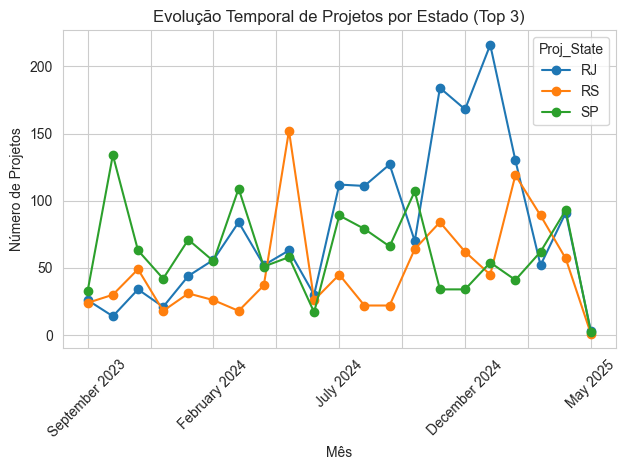

In [36]:
evolucao_temporal.index = evolucao_temporal.index.astype(str) 
evolucao_temporal.plot(marker='o')
plt.title("Evolução Temporal de Projetos por Estado (Top 3)")
plt.ylabel("Número de Projetos")
plt.xlabel("Mês")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

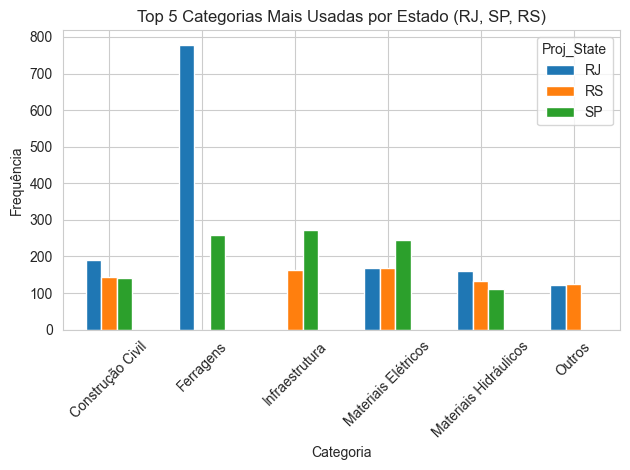

In [38]:
top5_categorias_por_estado = (
    df_top_states.groupby(['Proj_State', 'Cat_Name']).size()
    .groupby(level=0, group_keys=False)
    .nlargest(5)
)

top5_df = top5_categorias_por_estado.reset_index(name='Frequencia')
pivot_top5 = top5_df.pivot(index='Cat_Name', columns='Proj_State', values='Frequencia').fillna(0)

pivot_top5.plot(kind='bar')
plt.title("Top 5 Categorias Mais Usadas por Estado (RJ, SP, RS)")
plt.ylabel("Frequência")
plt.xlabel("Categoria")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

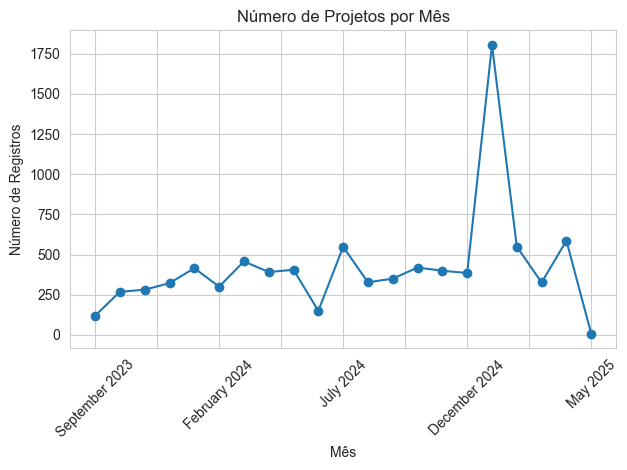

In [39]:
df['Proj_Date'] = pd.to_datetime(df['Proj_Date'], errors='coerce')
df['Month_Name'] = df['Proj_Date'].dt.strftime('%B %Y')

projects_by_month_named = df.groupby('Month_Name').size()
projects_by_month_named.index = pd.to_datetime(projects_by_month_named.index, format='%B %Y')
projects_by_month_named = projects_by_month_named.sort_index()
projects_by_month_named.index = projects_by_month_named.index.strftime('%B %Y')

plt.figure()
projects_by_month_named.plot(marker='o')
plt.title("Número de Projetos por Mês")
plt.ylabel("Número de Registros")
plt.xlabel("Mês")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()